# Analisi dati ultimo giorno disponibile
I dati elaborati sono quelli presenti nel file * dpc-covid19-ita-regioni.json * nella directory * dati-json *.

### Nella cella sottostante viene creato il dataset e mostrata una visione tabellare dello stesso.

In [1]:
import pandas as pd 
pd.plotting.register_matplotlib_converters()

dataset = pd.read_json('../dati-json/dpc-covid19-ita-regioni.json')
dataset['data'] = pd.to_datetime(dataset['data'])
dataset.set_index('data', inplace=True)

max_date = dataset.index.max()
subset = dataset.loc[[max_date], ['denominazione_regione', 'ricoverati_con_sintomi', 'terapia_intensiva', 'totale_ospedalizzati', 'isolamento_domiciliare', 'totale_positivi', 'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti', 'deceduti', 'casi_da_sospetto_diagnostico', 'casi_da_screening', 'totale_casi', 'tamponi', 'casi_testati']]

subset

,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati
data,,,,,,,,,,,,,,,
2021-02-22 17:00:00,Abruzzo,593,76,669,12304,12973,49,351,36841,1628,NaN,NaN,51442,933593,480727.0
2021-02-22 17:00:00,Basilicata,80,4,84,3505,3589,11,41,10929,368,NaN,NaN,14886,238294,141395.0
2021-02-22 17:00:00,Calabria,176,19,195,6147,6342,-25,118,29695,667,NaN,NaN,36704,569685,537967.0
2021-02-22 17:00:00,Campania,1319,125,1444,69808,71252,-42,1202,178925,4141,NaN,NaN,254318,2805856,1955767.0
2021-02-22 17:00:00,Emilia-Romagna,2017,194,2211,34305,36516,488,1847,200972,10368,NaN,NaN,247856,3636600,1463743.0
2021-02-22 17:00:00,Friuli Venezia Giulia,350,56,406,8885,9291,17,145,62042,2775,NaN,NaN,74108,1299729,464867.0
2021-02-22 17:00:00,Lazio,1861,233,2094,33116,35210,-229,854,185715,5743,NaN,NaN,226668,3910343,2729147.0
2021-02-22 17:00:00,Liguria,515,56,571,4427,4998,108,136,67328,3584,NaN,NaN,75910,991704,423907.0
2021-02-22 17:00:00,Lombardia,3826,391,4217,49152,53369,-1676,1491,499299,28103,NaN,NaN,580771,6382898,3039913.0


** Setup base della libreria di renderizzazione dei grafici. **

In [2]:
import matplotlib.pyplot as plt 

plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=20)
default_figsize = (30, 10)
default_titlesize = 25
default_padding = 15
default_labelsize = 20
default_labelpos = 'offset points'
default_labelxy = (35, -7)

## Ricoverati con sintomi

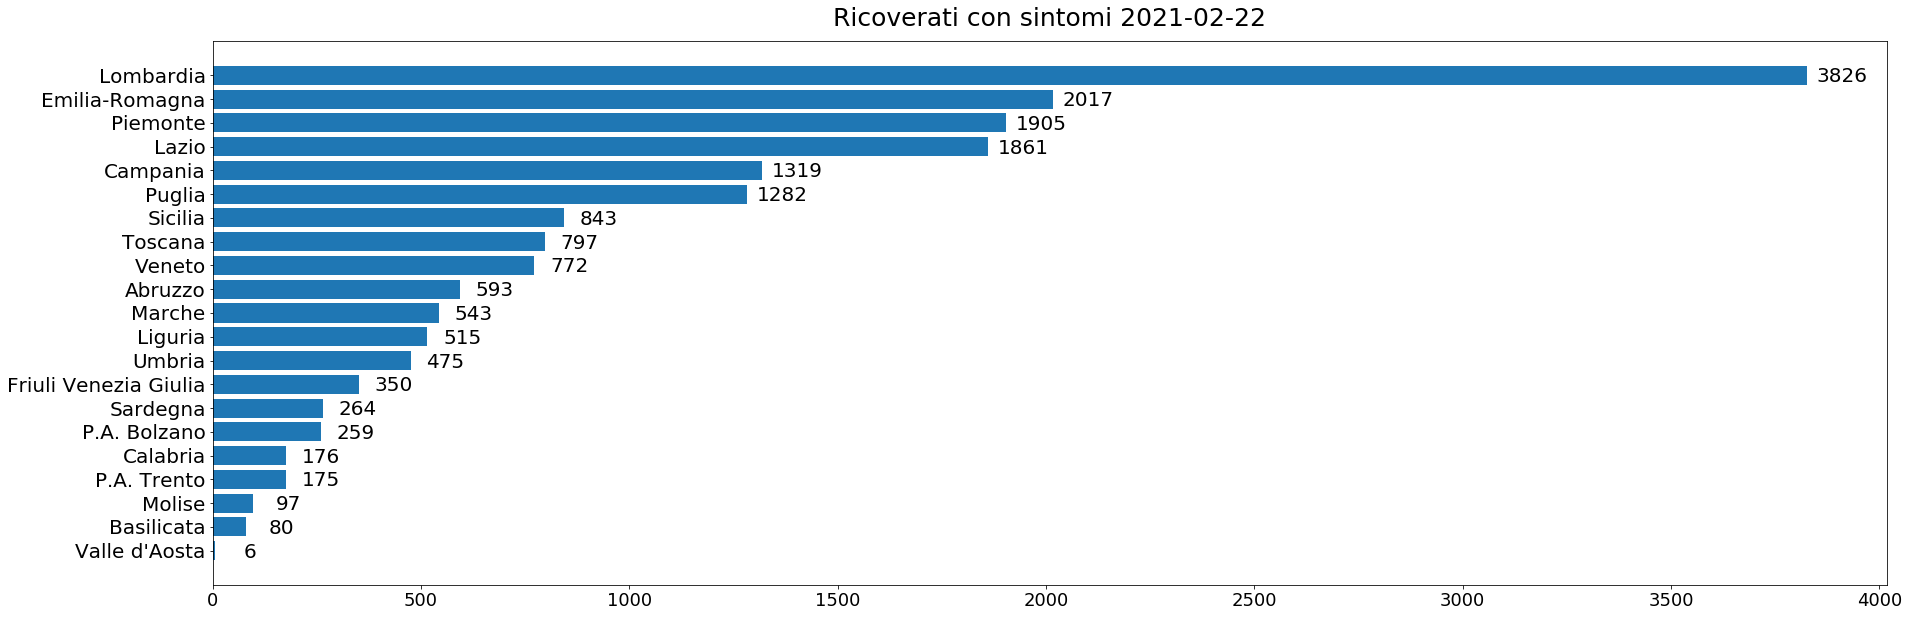

In [3]:
plt.figure(figsize=default_figsize)
subset.sort_values(by=['ricoverati_con_sintomi'], ascending=True, inplace=True)
plt.barh(subset.denominazione_regione.values, subset.ricoverati_con_sintomi.values)
plt.title('Ricoverati con sintomi {}'.format(max_date.date()), fontsize=default_titlesize, pad=default_padding)
for x, y in zip(subset.denominazione_regione.values, subset.ricoverati_con_sintomi.values):
    plt.annotate(y, (y, x), textcoords=default_labelpos, xytext=default_labelxy, ha='center', fontsize=default_labelsize)
plt.show()

## Occupazione attuale delle terapie intensive

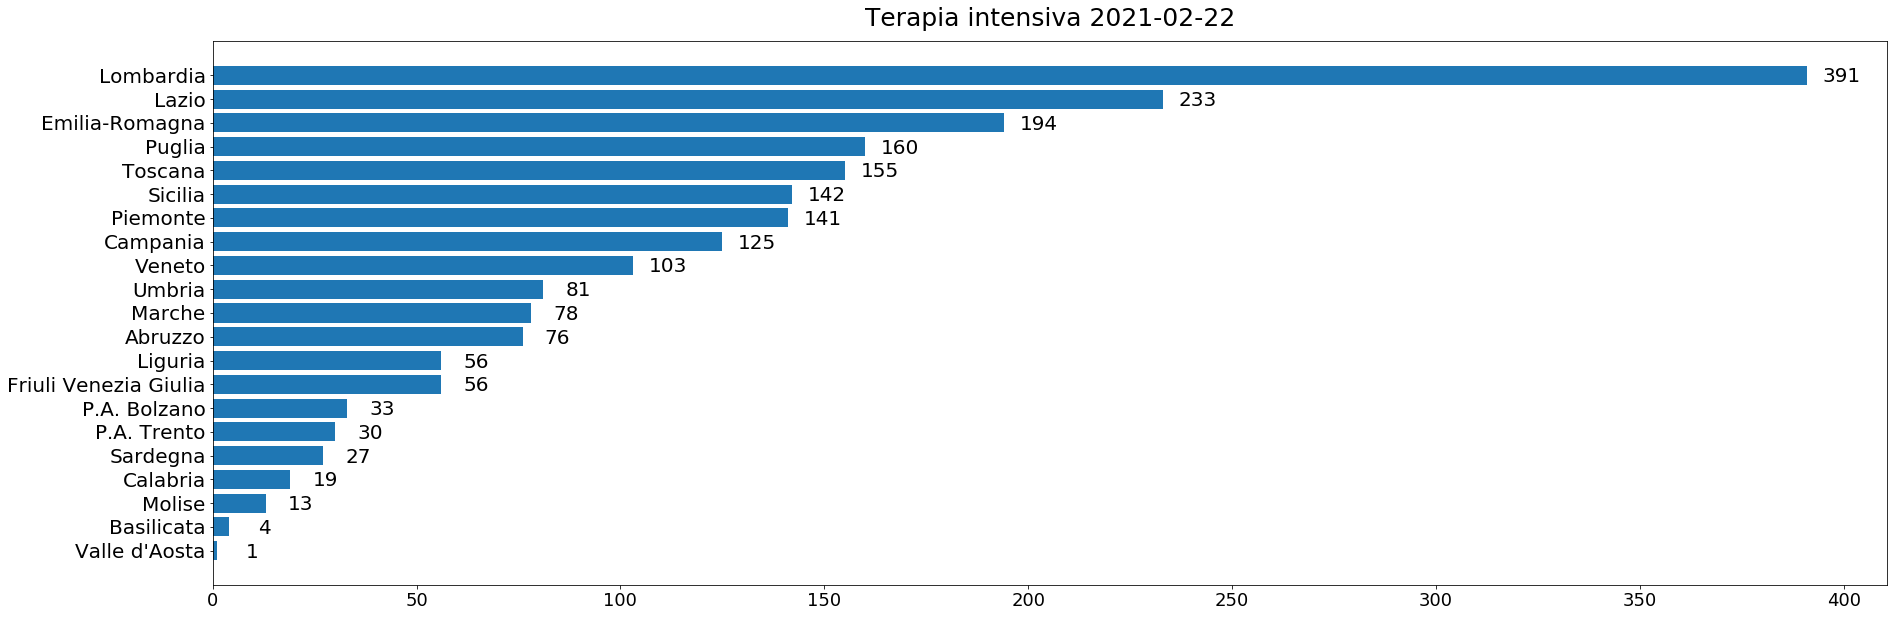

In [4]:
plt.figure(figsize=default_figsize)
subset.sort_values(by=['terapia_intensiva'], ascending=True, inplace=True)
plt.barh(subset.denominazione_regione.values, subset.terapia_intensiva.values)
plt.title('Terapia intensiva {}'.format(max_date.date()), fontsize=default_titlesize, pad=default_padding)
for x, y in zip(subset.denominazione_regione.values, subset.terapia_intensiva.values):
    plt.annotate(y, (y, x), textcoords=default_labelpos, xytext=default_labelxy, ha='center', fontsize=default_labelsize)
plt.show()

## Totale dei pazienti attualmente ospedalizzati

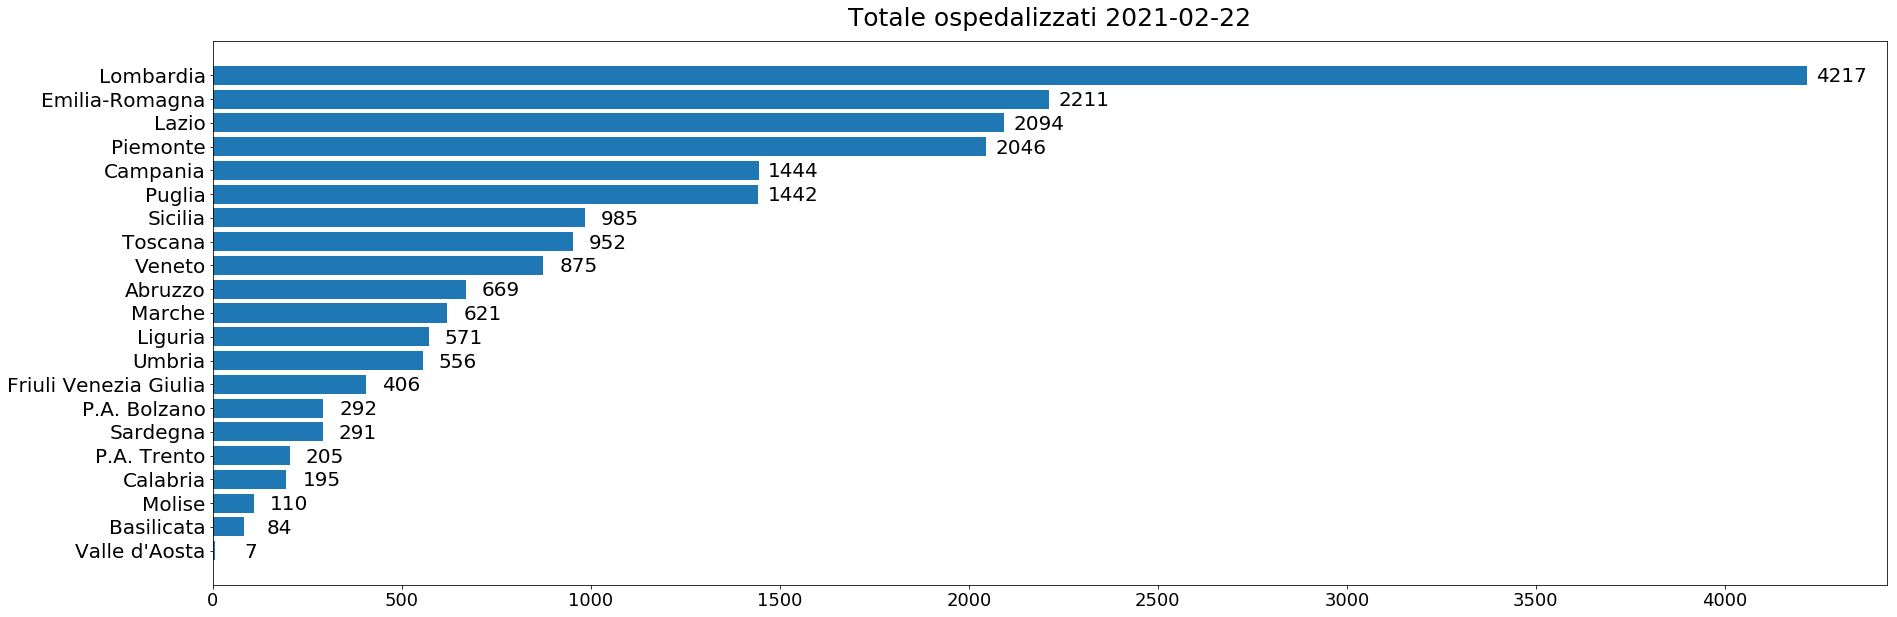

In [5]:
plt.figure(figsize=default_figsize)
subset.sort_values(by=['totale_ospedalizzati'], ascending=True, inplace=True)
plt.barh(subset.denominazione_regione.values, subset.totale_ospedalizzati.values)
plt.title('Totale ospedalizzati {}'.format(max_date.date()), fontsize=default_titlesize, pad=default_padding)
for x, y in zip(subset.denominazione_regione.values, subset.totale_ospedalizzati.values):
    plt.annotate(y, (y, x), textcoords=default_labelpos, xytext=default_labelxy, ha='center', fontsize=default_labelsize)
plt.show()

## Totale delle persone in isolamento domiciliare

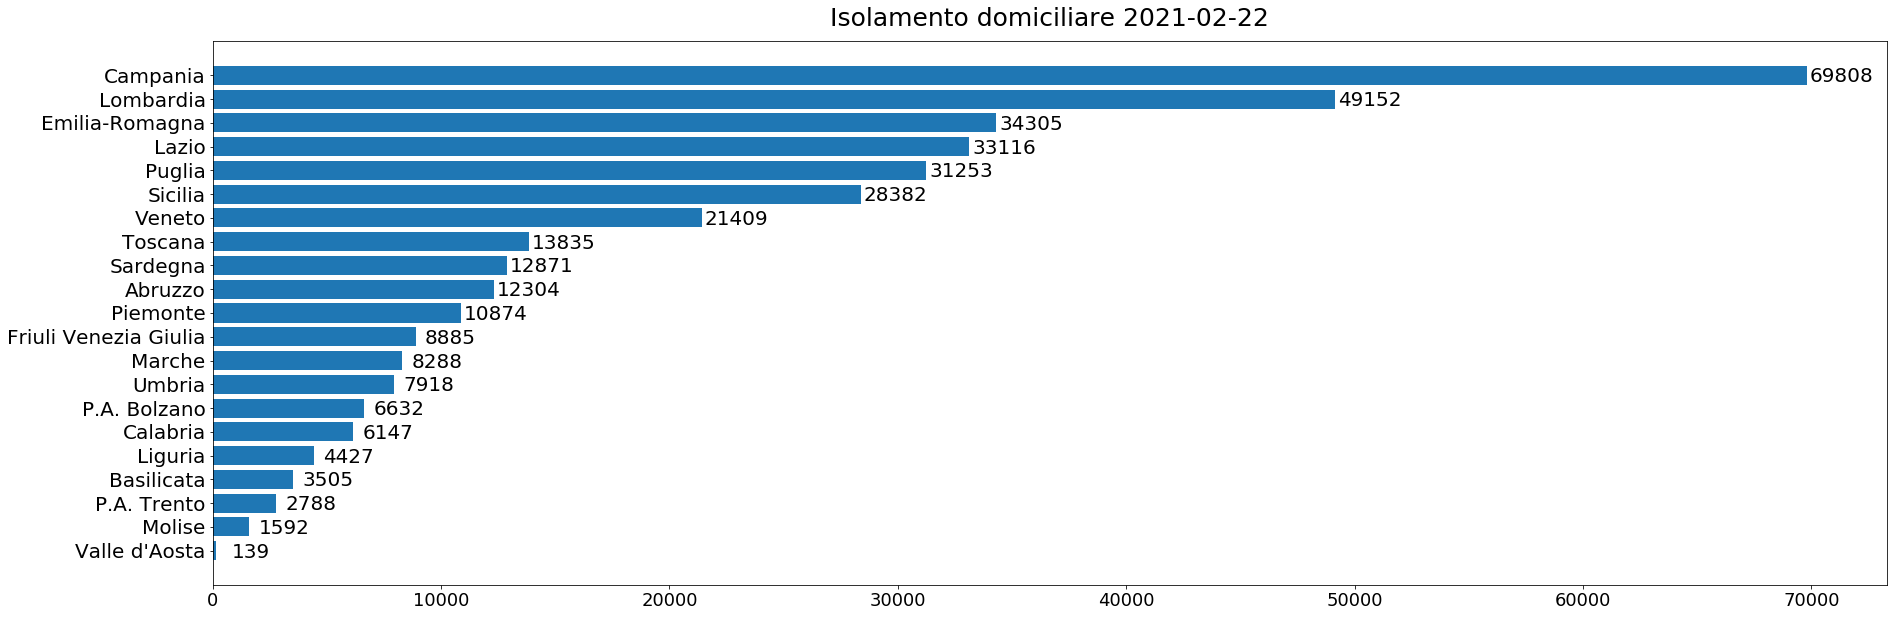

In [6]:
plt.figure(figsize=default_figsize)
subset.sort_values(by=['isolamento_domiciliare'], ascending=True, inplace=True)
plt.barh(subset.denominazione_regione.values, subset.isolamento_domiciliare.values)
plt.title('Isolamento domiciliare {}'.format(max_date.date()), fontsize=default_titlesize, pad=default_padding)
for x, y in zip(subset.denominazione_regione.values, subset.isolamento_domiciliare.values):
    plt.annotate(y, (y, x), textcoords=default_labelpos, xytext=default_labelxy, ha='center', fontsize=default_labelsize)
plt.show()

## Totale positivi
Calcolati con la formula: $ totale\_ospedalizzati + isolamento\_domiciliare $

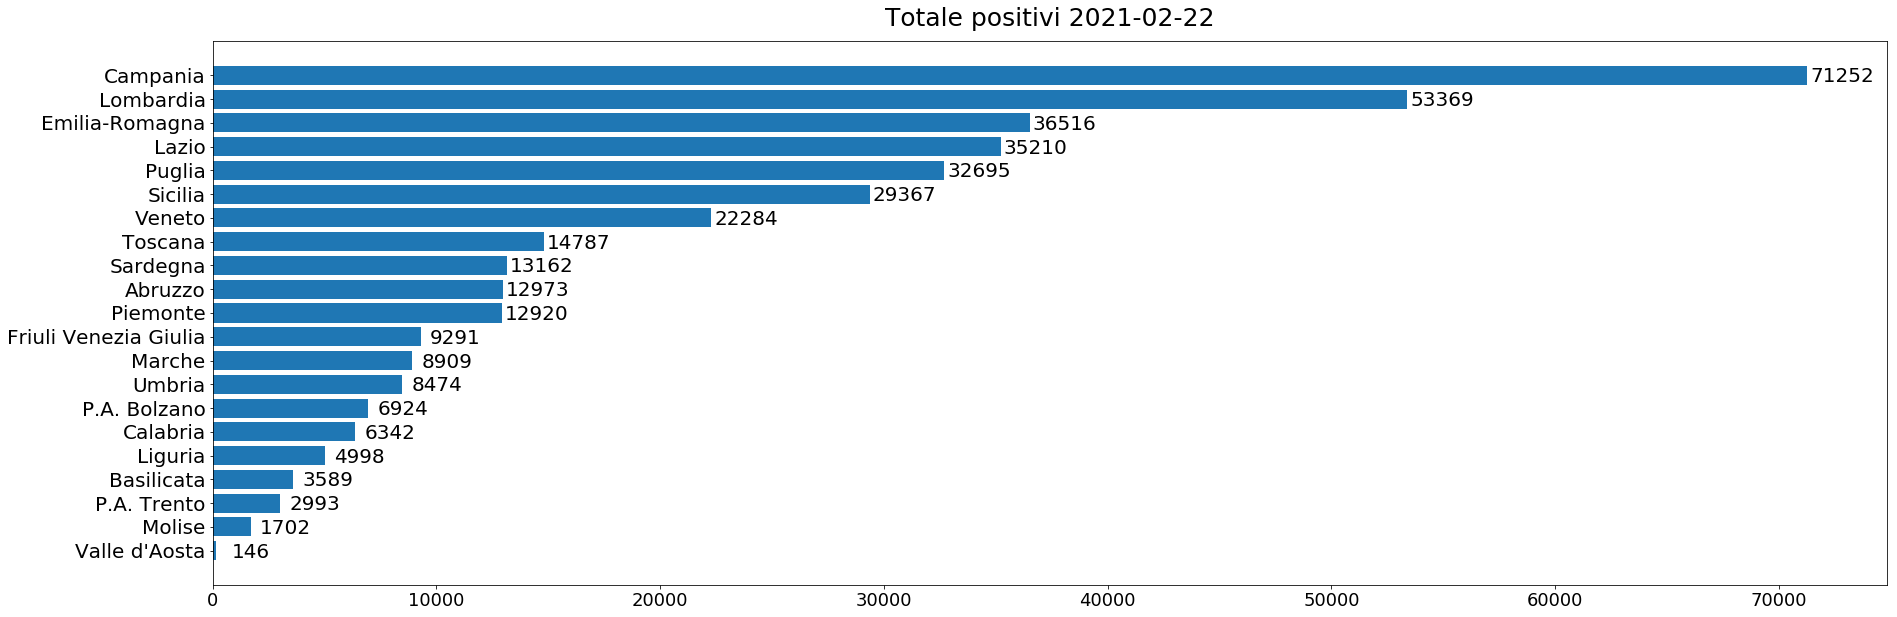

In [7]:
plt.figure(figsize=default_figsize)
subset.sort_values(by=['totale_positivi'], ascending=True, inplace=True)
plt.barh(subset.denominazione_regione.values, subset.totale_positivi.values)
plt.title('Totale positivi {}'.format(max_date.date()), fontsize=default_titlesize, pad=default_padding)
for x, y in zip(subset.denominazione_regione.values, subset.totale_positivi.values):
    plt.annotate(y, (y, x), textcoords=default_labelpos, xytext=default_labelxy, ha='center', fontsize=default_labelsize)
plt.show()

## Variazione totale positivi

Calcolati con la formula: $ totale\_positivi\ giorno\ corrente - totale\_positivi\ giorno\ precedente $


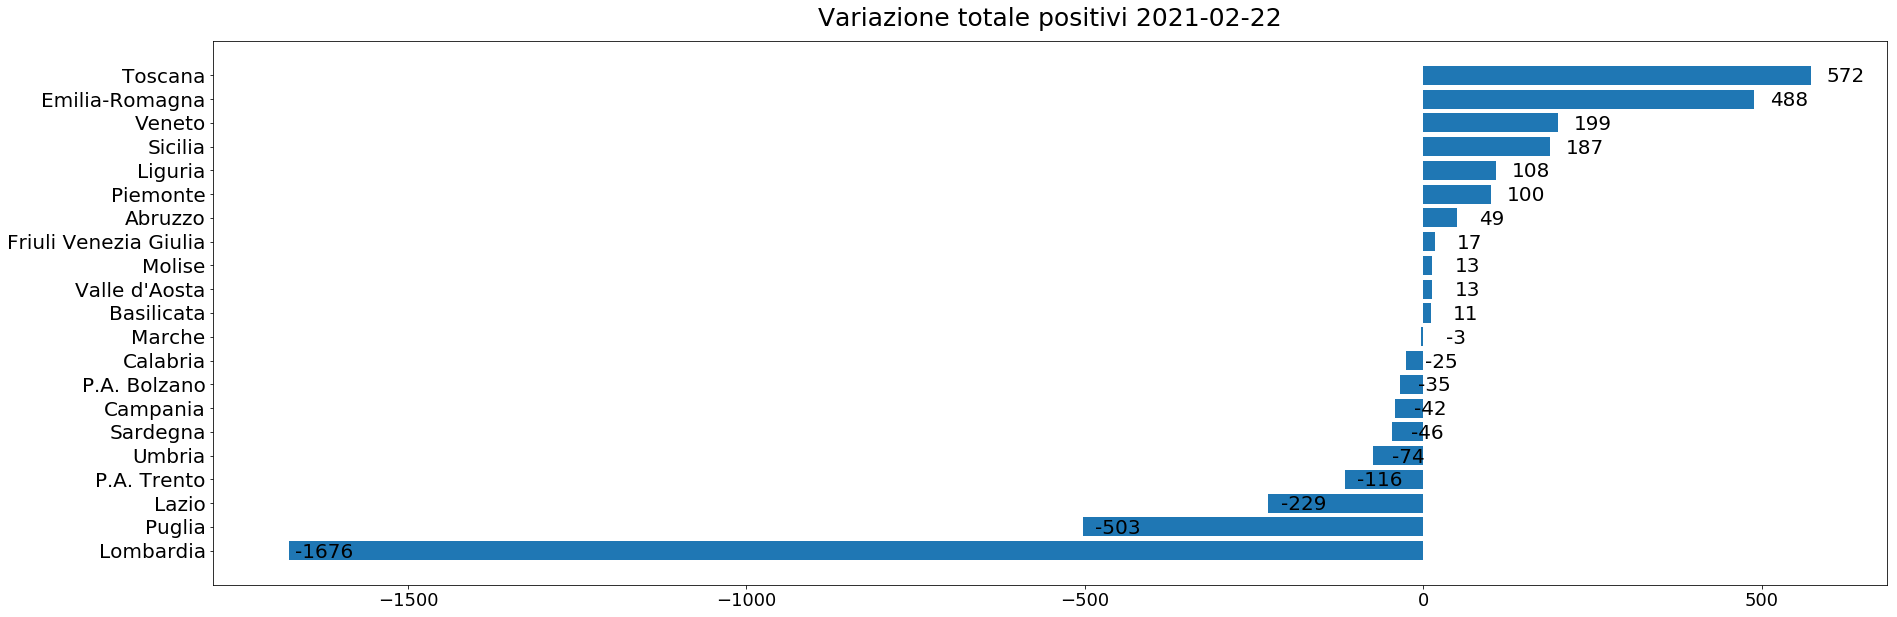

In [8]:
plt.figure(figsize=default_figsize)
subset.sort_values(by=['variazione_totale_positivi'], ascending=True, inplace=True)
plt.barh(subset.denominazione_regione.values, subset.variazione_totale_positivi.values)
plt.title('Variazione totale positivi {}'.format(max_date.date()), fontsize=default_titlesize, pad=default_padding)
for x, y in zip(subset.denominazione_regione.values, subset.variazione_totale_positivi.values):
    plt.annotate(y, (y, x), textcoords=default_labelpos, xytext=default_labelxy, ha='center', fontsize=default_labelsize)
plt.show()

## Nuovi positivi

Calcolati con la formula: $ totale\_casi\ giorno\ corrente - totale\_casi\ giorno\ precedente $

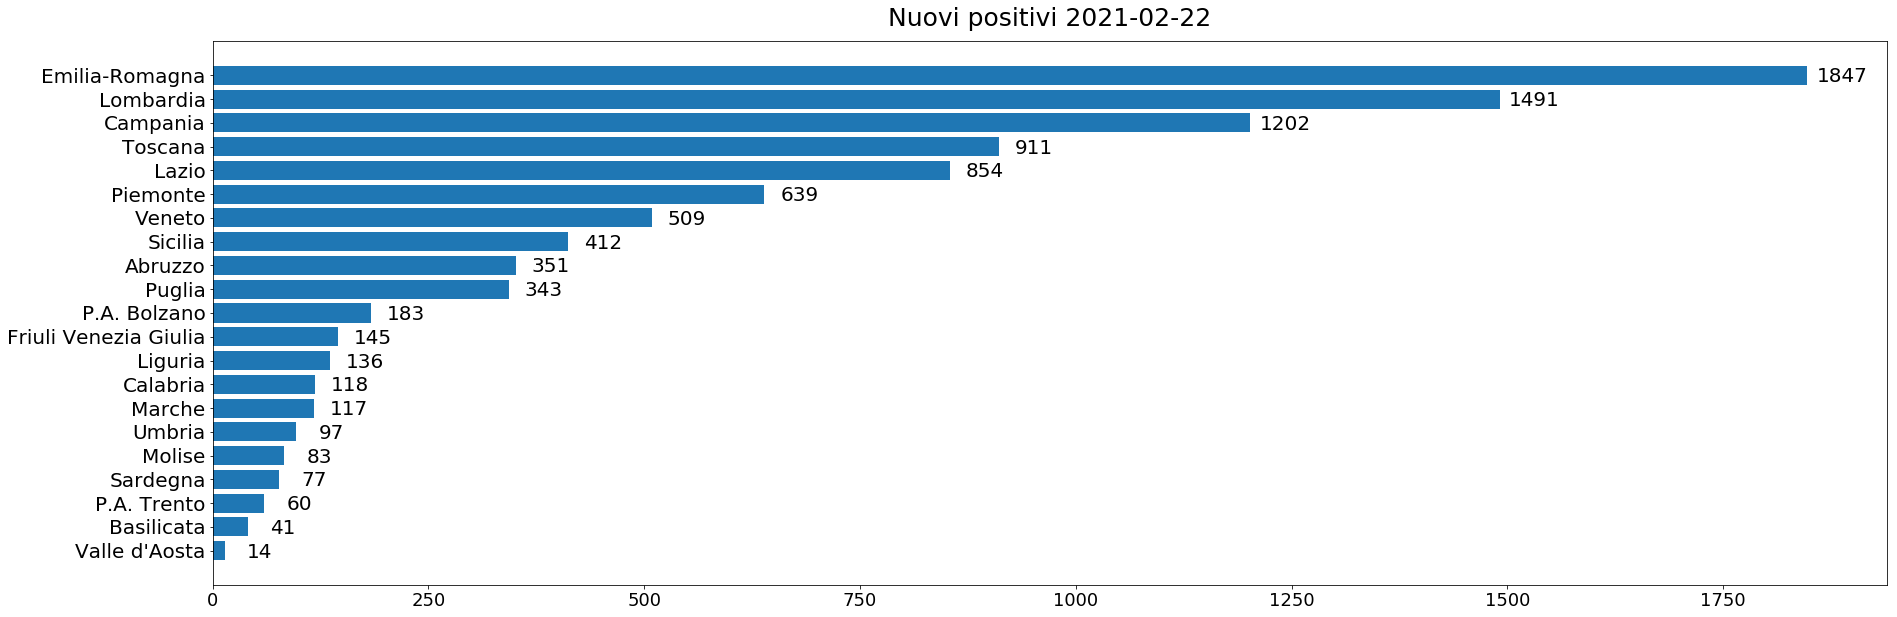

In [9]:
plt.figure(figsize=default_figsize)
subset.sort_values(by=['nuovi_positivi'], ascending=True, inplace=True)
plt.barh(subset.denominazione_regione.values, subset.nuovi_positivi.values)
plt.title('Nuovi positivi {}'.format(max_date.date()), fontsize=default_titlesize, pad=default_padding)
for x, y in zip(subset.denominazione_regione.values, subset.nuovi_positivi.values):
    plt.annotate(y, (y, x), textcoords=default_labelpos, xytext=default_labelxy, ha='center', fontsize=default_labelsize)
plt.show()

## Dimessi guariti

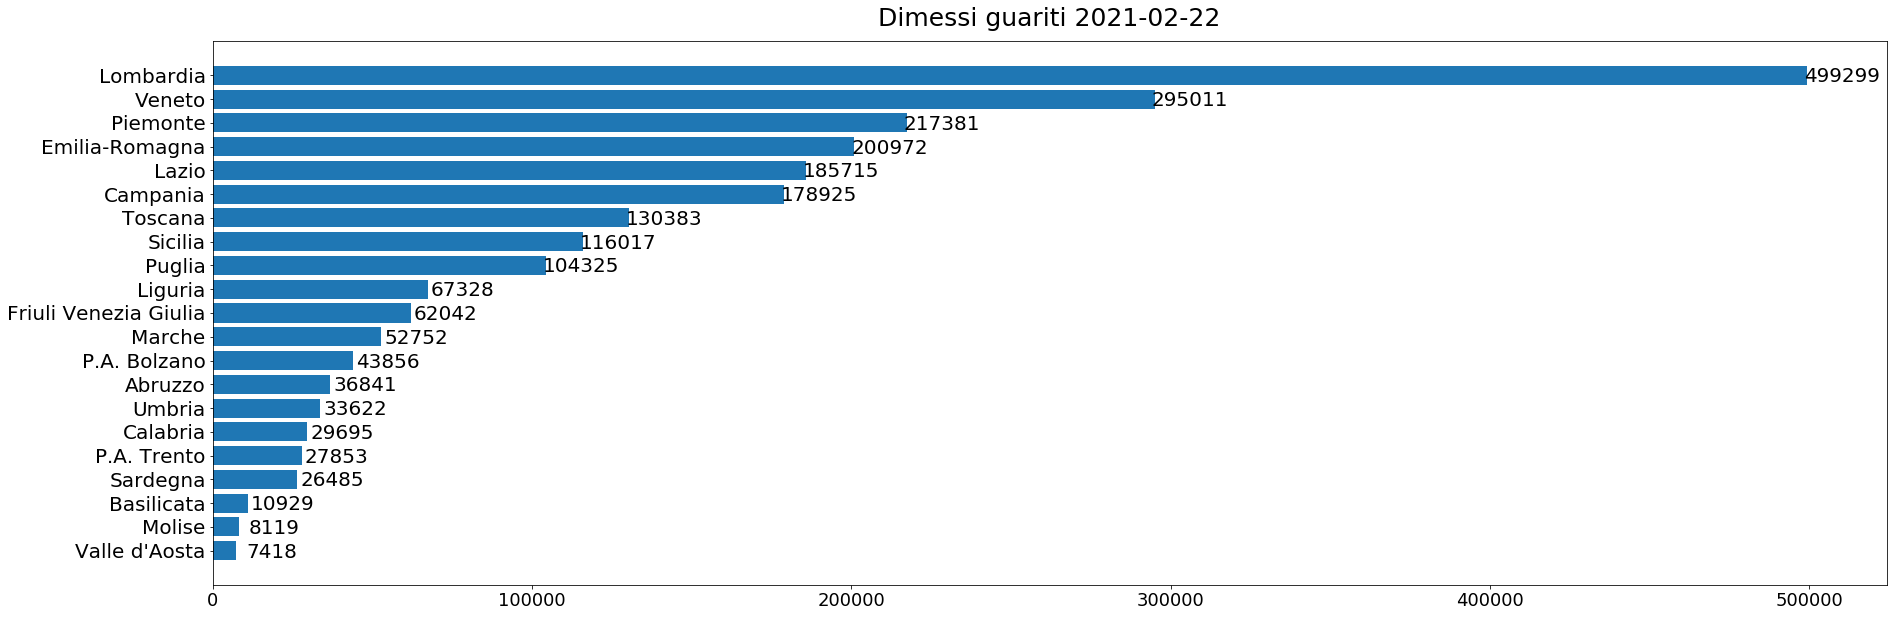

In [10]:
plt.figure(figsize=default_figsize)
subset.sort_values(by=['dimessi_guariti'], ascending=True, inplace=True)
plt.barh(subset.denominazione_regione.values, subset.dimessi_guariti.values)
plt.title('Dimessi guariti {}'.format(max_date.date()), fontsize=default_titlesize, pad=default_padding)
for x, y in zip(subset.denominazione_regione.values, subset.dimessi_guariti.values):
    plt.annotate(y, (y, x), textcoords=default_labelpos, xytext=default_labelxy, ha='center', fontsize=default_labelsize)
plt.show()

## Deceduti

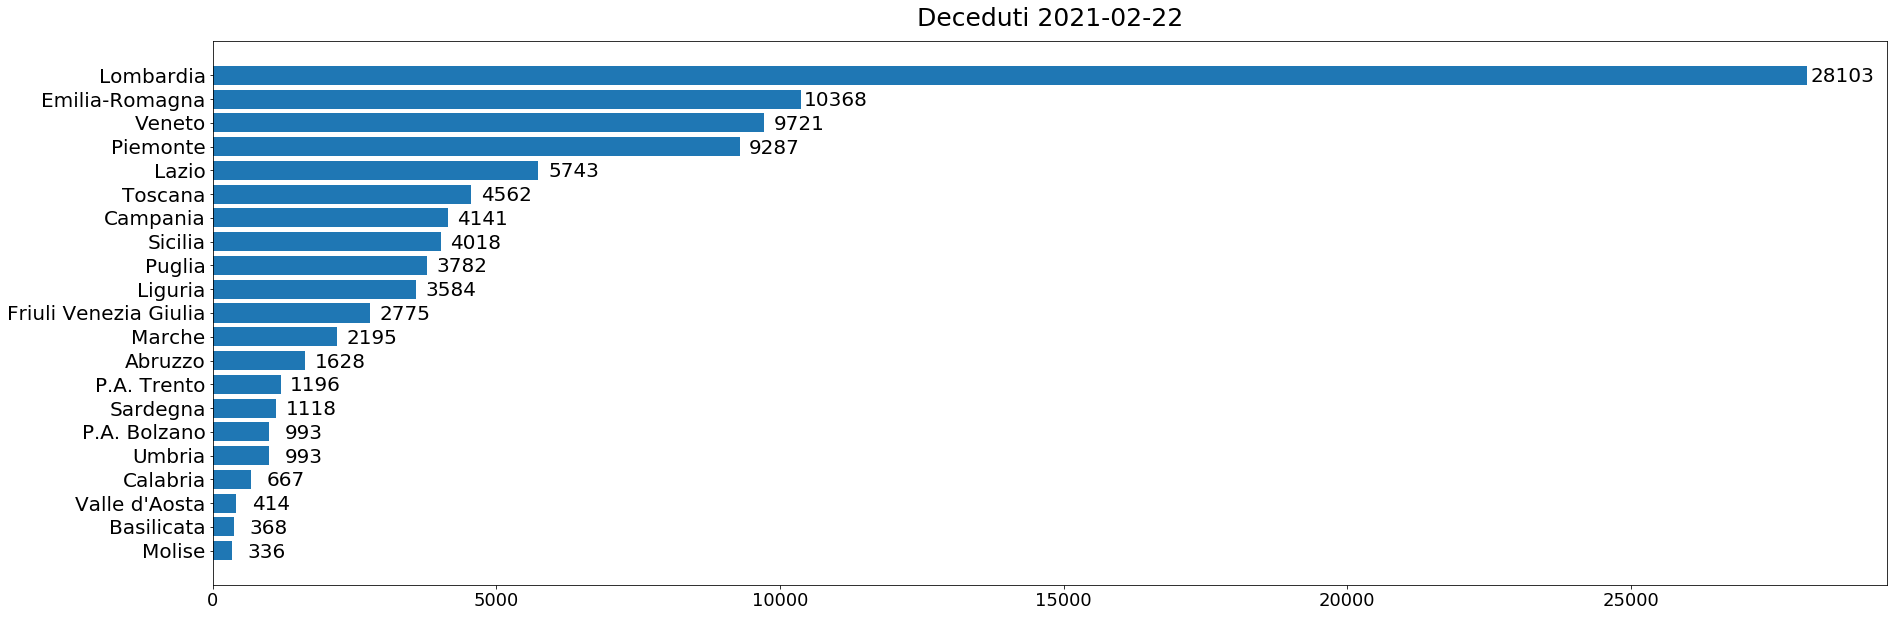

In [11]:
plt.figure(figsize=default_figsize)
subset.sort_values(by=['deceduti'], ascending=True, inplace=True)
plt.barh(subset.denominazione_regione.values, subset.deceduti.values)
plt.title('Deceduti {}'.format(max_date.date()), fontsize=default_titlesize, pad=default_padding)
for x, y in zip(subset.denominazione_regione.values, subset.deceduti.values):
    plt.annotate(y, (y, x), textcoords=default_labelpos, xytext=default_labelxy, ha='center', fontsize=default_labelsize)
plt.show()

## Casi da sospetto diagnostico

Casi positivi al tampone emersi da attività clinica.

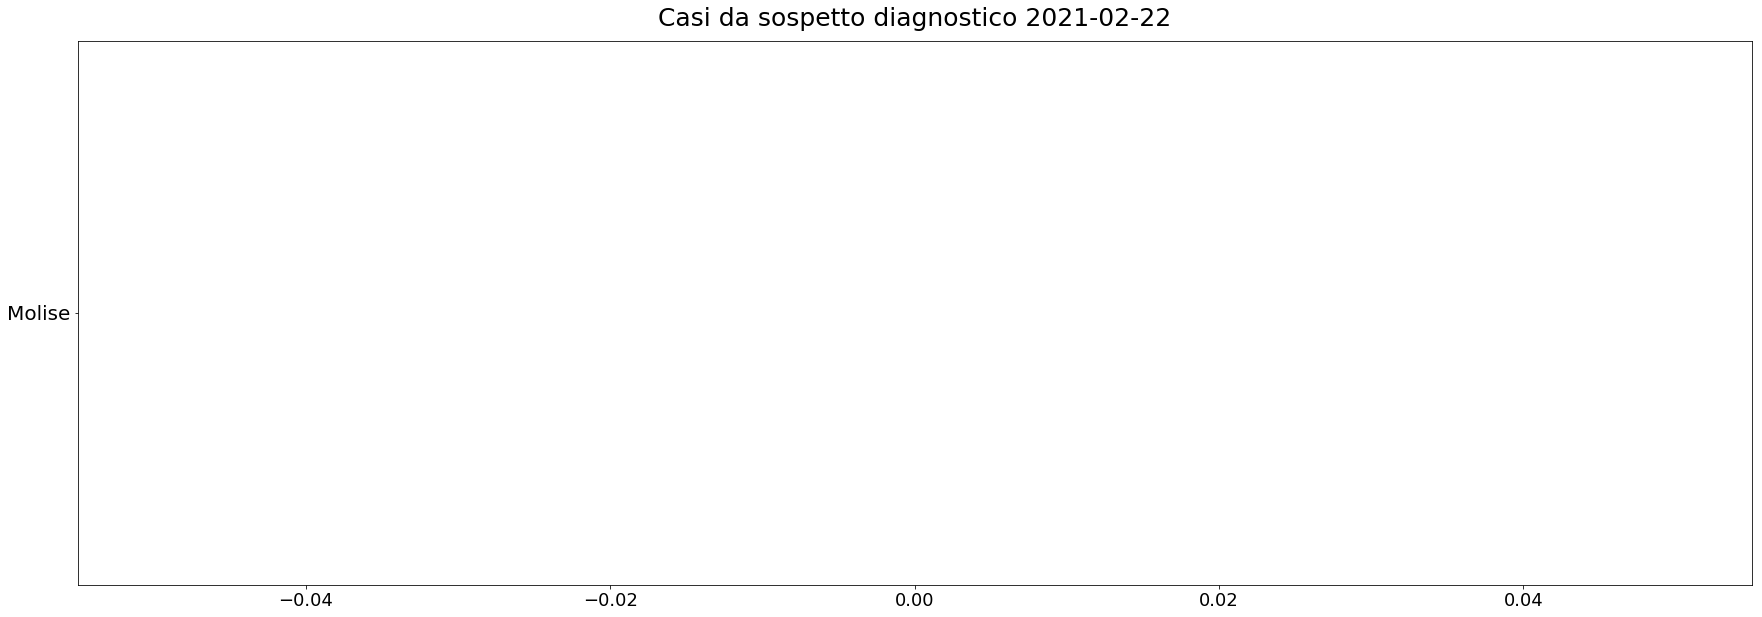

In [12]:
plt.figure(figsize=default_figsize)
subset.sort_values(by=['casi_da_sospetto_diagnostico'], ascending=True, inplace=True)
plt.barh(subset.denominazione_regione.values, subset.casi_da_sospetto_diagnostico.values)
plt.title('Casi da sospetto diagnostico {}'.format(max_date.date()), fontsize=default_titlesize, pad=default_padding)
for x, y in zip(subset.denominazione_regione.values, subset.casi_da_sospetto_diagnostico.values):
    label = '{:.0f}'.format(y)
    plt.annotate(label, (y, x), textcoords=default_labelpos, xytext=default_labelxy, ha='center', fontsize=default_labelsize)
plt.show()

## Casi da screening

Casi positivi emersi da indagini e test, pianificati a livello nazionale o regionale.

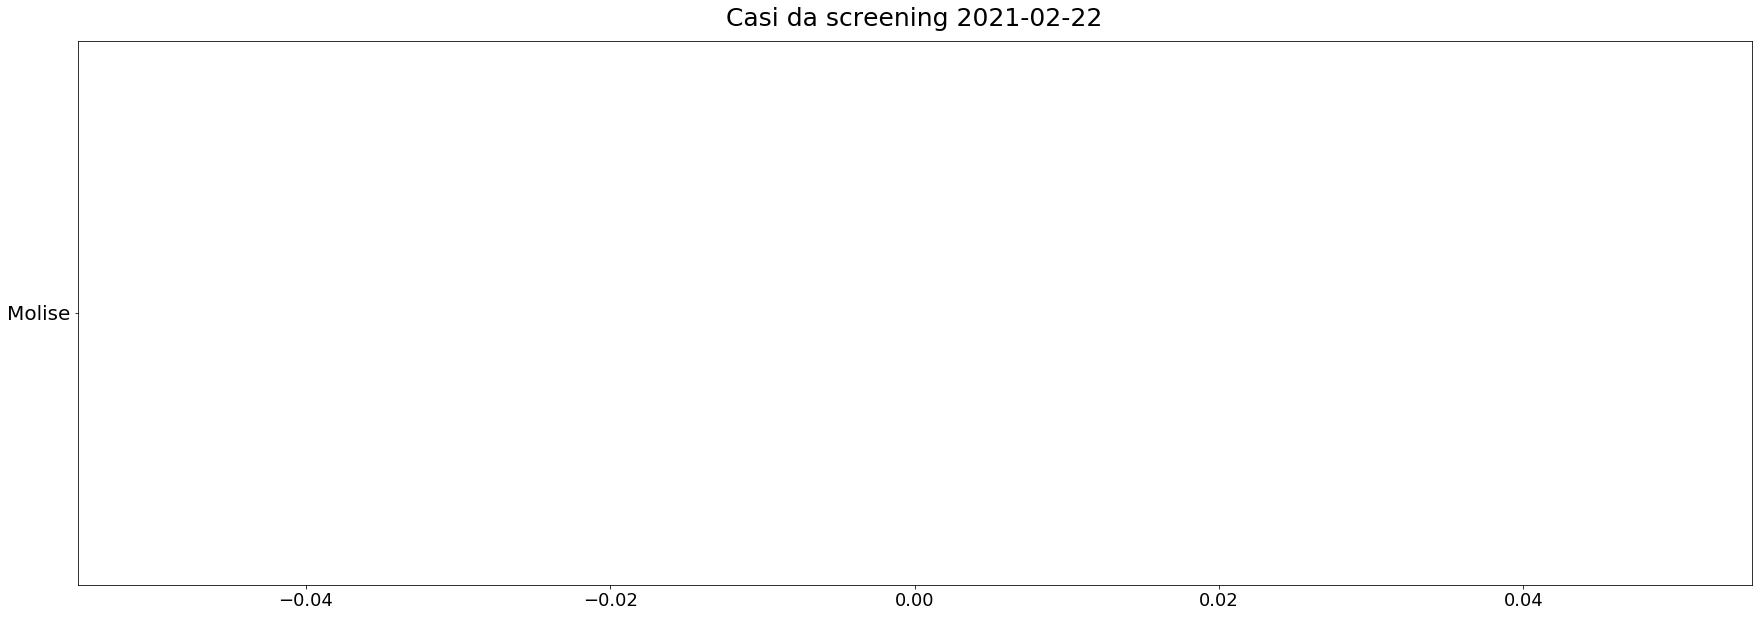

In [13]:
plt.figure(figsize=default_figsize)
subset.sort_values(by=['casi_da_screening'], ascending=True, inplace=True)
plt.barh(subset.denominazione_regione.values, subset.casi_da_screening.values)
plt.title('Casi da screening {}'.format(max_date.date()), fontsize=default_titlesize, pad=default_padding)
for x, y in zip(subset.denominazione_regione.values, subset.casi_da_screening.values):
    label = '{:.0f}'.format(y)
    plt.annotate(label, (y, x), textcoords=default_labelpos, xytext=default_labelxy, ha='center', fontsize=default_labelsize)
plt.show()

## Totale casi

Totale casi positivi.

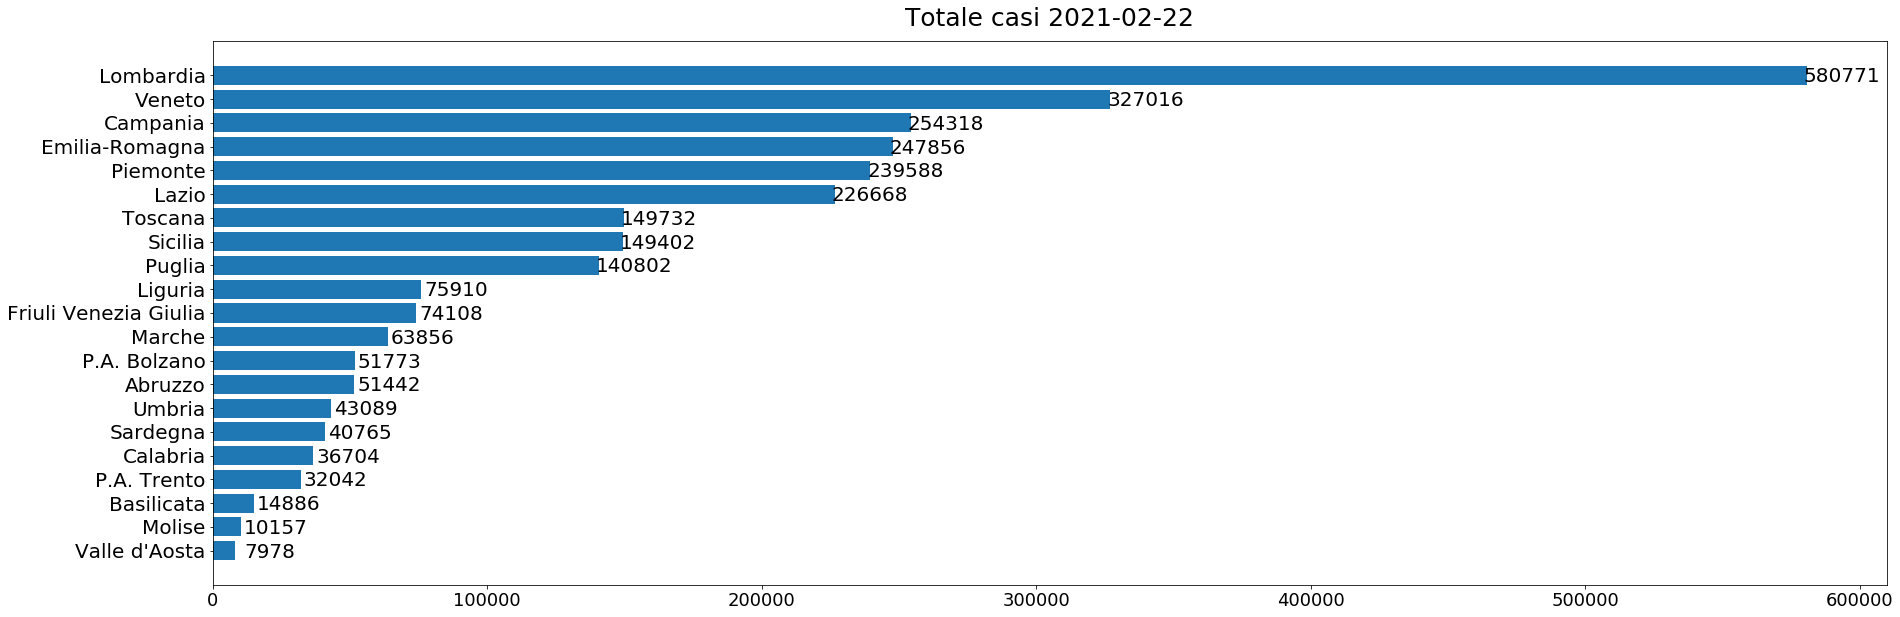

In [14]:
plt.figure(figsize=default_figsize)
subset.sort_values(by=['totale_casi'], ascending=True, inplace=True)
plt.barh(subset.denominazione_regione.values, subset.totale_casi.values)
plt.title('Totale casi {}'.format(max_date.date()), fontsize=default_titlesize, pad=default_padding)
for x, y in zip(subset.denominazione_regione.values, subset.totale_casi.values):
    label = '{:.0f}'.format(y)
    plt.annotate(label, (y, x), textcoords=default_labelpos, xytext=default_labelxy, ha='center', fontsize=default_labelsize)
plt.show()

## Tamponi

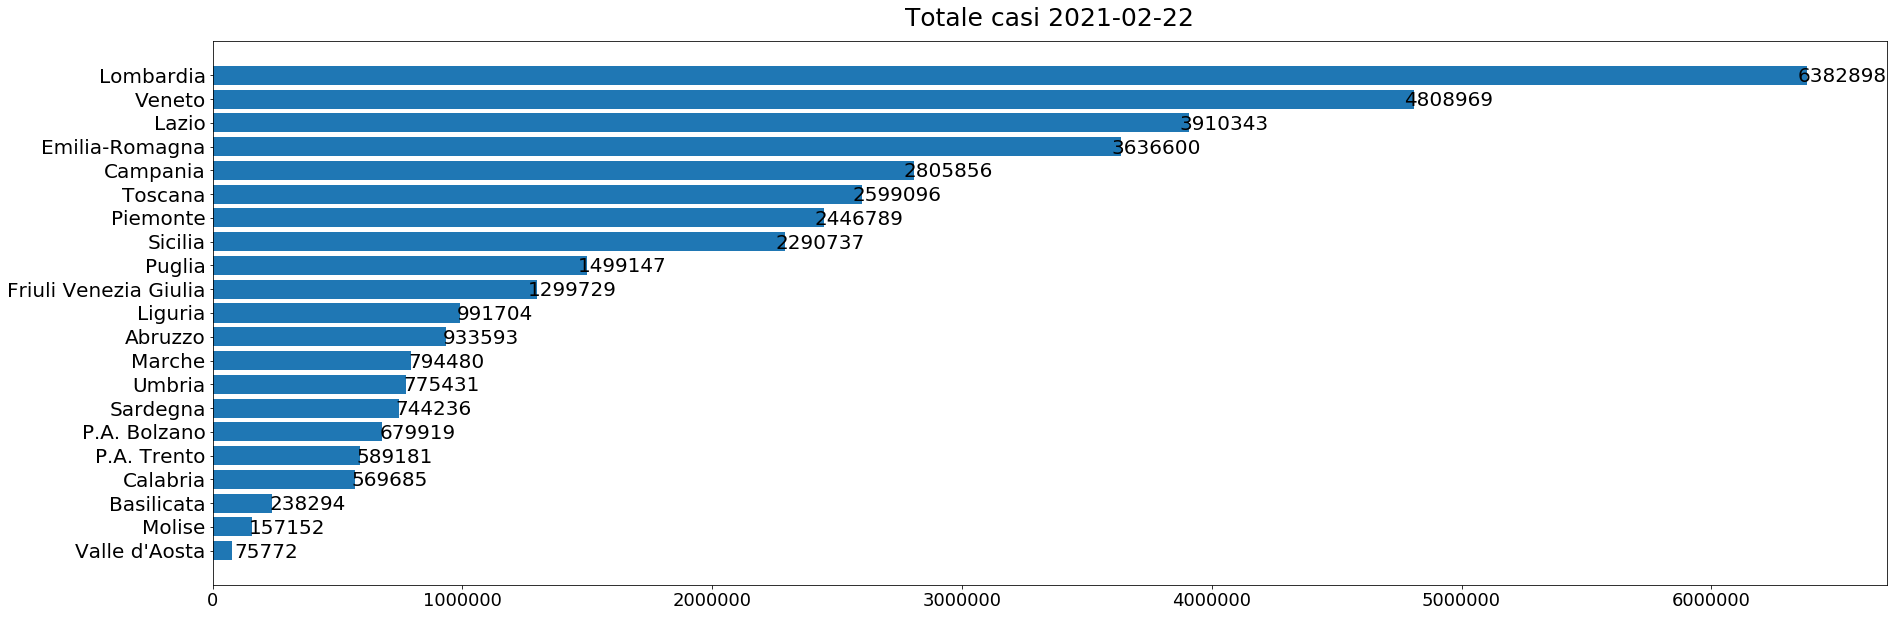

In [15]:
plt.figure(figsize=default_figsize)
subset.sort_values(by=['tamponi'], ascending=True, inplace=True)
plt.barh(subset.denominazione_regione.values, subset.tamponi.values)
plt.title('Totale casi {}'.format(max_date.date()), fontsize=default_titlesize, pad=default_padding)
for x, y in zip(subset.denominazione_regione.values, subset.tamponi.values):
    label = '{:.0f}'.format(y)
    plt.annotate(label, (y, x), textcoords=default_labelpos, xytext=default_labelxy, ha='center', fontsize=default_labelsize)
plt.show()

## Casi testati

Totale dei soggetti sottoposti al test.

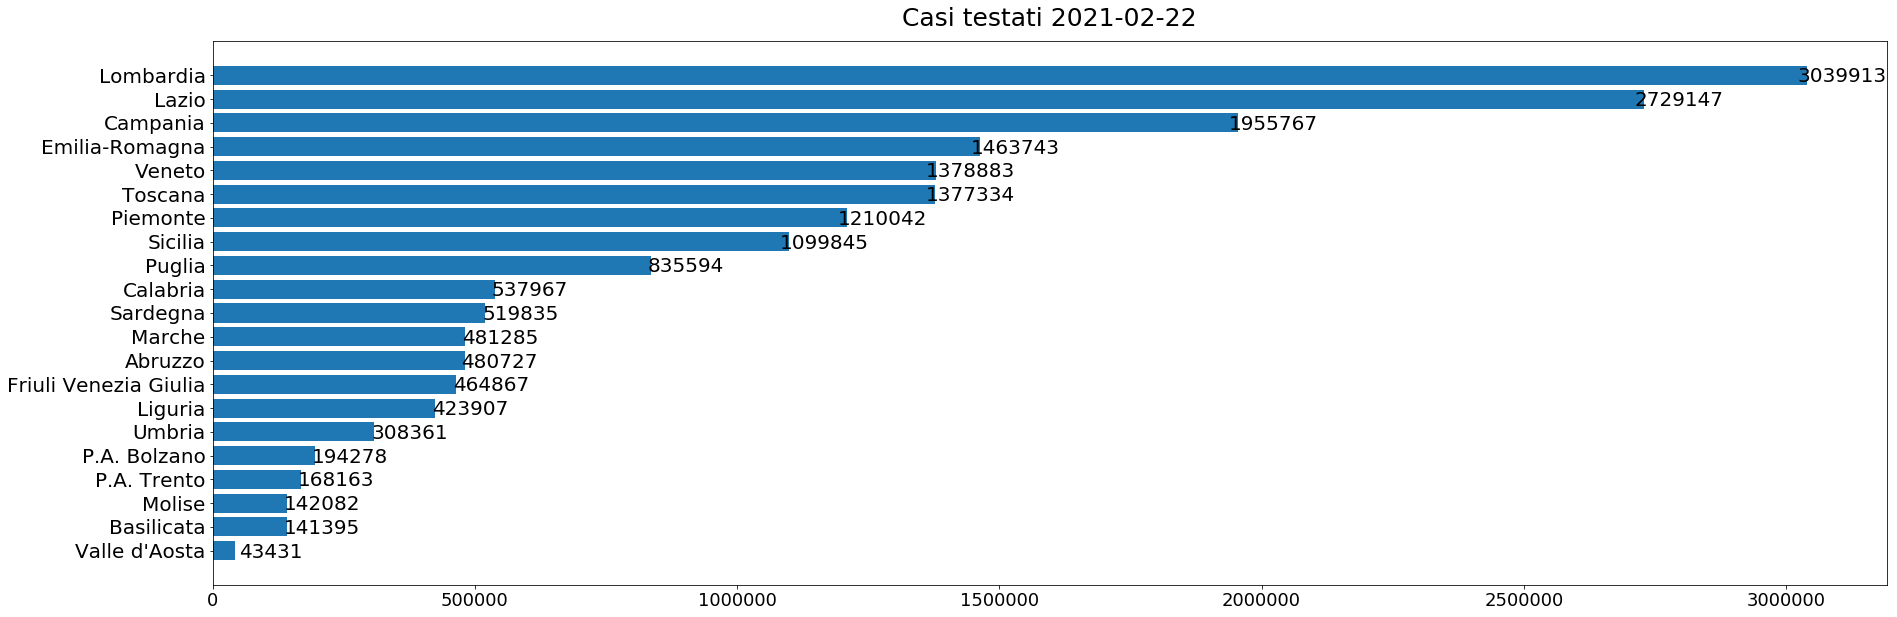

In [16]:
plt.figure(figsize=default_figsize)
subset.sort_values(by=['casi_testati'], ascending=True, inplace=True)
plt.barh(subset.denominazione_regione.values, subset.casi_testati.values)
plt.title('Casi testati {}'.format(max_date.date()), fontsize=default_titlesize, pad=default_padding)
for x, y in zip(subset.denominazione_regione.values, subset.casi_testati.values):
    label = '{:.0f}'.format(y)
    plt.annotate(label, (y, x), textcoords=default_labelpos, xytext=default_labelxy, ha='center', fontsize=default_labelsize)
plt.show()